# Sachit Desai coding challenge notebook

## 1. import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

## 2. load datasets

In [ ]:
#loading the csv's into dataframes
training_df = pd.read_csv("https://raw.githubusercontent.com/SachitDesai/coding-challenge/main/training-dataset.csv")
testing_df = pd.read_csv("https://raw.githubusercontent.com/SachitDesai/coding-challenge/main/testing-dataset.csv")

## 3. understanding the dataset / EDA





In [ ]:
training_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [ ]:
testing_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [ ]:
print(training_df.describe())
print(training_df.info())

       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB
None


In [ ]:
# count of categorical variables
print(training_df['ProductType'].value_counts())
print(training_df['Manufacturer'].value_counts())
print(training_df['Area Code'].value_counts())
print(training_df['Sourcing Channel'].value_counts())
print(training_df['Product Size'].value_counts())
print(training_df['Month of Sourcing'].value_counts())

ProductType
NTM2    236726
NTM1    194923
NTM3    118527
Name: count, dtype: int64
Manufacturer
X1    419857
X2    120695
X3      9624
Name: count, dtype: int64
Area Code
A28    41925
A7     36723
A3     33247
A11    31111
A8     28772
A44    26490
A5     24252
A10    22970
A25    20422
A31    18379
A29    18105
A16    15938
A12    14547
A40    13820
A21    13374
A43    13234
A2     13145
A1     12676
A6     12399
A4     11326
A24    10725
A18    10154
A9     10107
A22     9624
A14     9424
A35     8877
A45     8188
A13     7548
A42     6470
A33     5769
A15     5496
A32     5408
A36     4843
A34     4249
A19     3839
A38     3065
A26     2360
A30     2357
A20     2126
A46     1732
A39     1702
A37     1432
A17     1139
A23      569
A41      118
Name: count, dtype: int64
Sourcing Channel
DIRECT       453617
RETAIL        60011
ECOM          31106
WHOLESALE      5442
Name: count, dtype: int64
Product Size
Large         325566
Small         220462
ExtraLarge      4148
Name: count, dtype:

In [ ]:
# checking for null values
training_df.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [ ]:
# checking all the unique values in each feature
for col in training_df.columns:
    if col != "Sourcing Cost":
        unique_entries = training_df[col].unique()
        print(f"Unique entries for column '{col}':")
        print(unique_entries)
        print()

Unique entries for column 'ProductType':
['NTM3' 'NTM2' 'NTM1']

Unique entries for column 'Manufacturer':
['X1' 'X2' 'X3']

Unique entries for column 'Area Code':
['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']

Unique entries for column 'Sourcing Channel':
['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']

Unique entries for column 'Product Size':
['Large' 'Small' 'ExtraLarge']

Unique entries for column 'Product Type':
['Powder' 'Liquid']

Unique entries for column 'Month of Sourcing':
['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20']



In [ ]:
# checking number of duplicate rows
print("\nNumber of duplicate rows:", training_df.duplicated().sum())


Number of duplicate rows: 542796


In [ ]:
# finding the range of Sourcing Cost
min_sourcing_cost = training_df['Sourcing Cost'].min()
max_sourcing_cost = training_df['Sourcing Cost'].max()
# noticed negative value in sourcing cost
print("Range of Sourcing Cost:")
print("Minimum Sourcing Cost:", min_sourcing_cost)
print("Maximum Sourcing Cost:", max_sourcing_cost)

Range of Sourcing Cost:
Minimum Sourcing Cost: -196.07
Maximum Sourcing Cost: 32632.5


In [ ]:
# printing all negative values in Sourcing Cost
negative_sourcing_cost = training_df[training_df['Sourcing Cost'] < 0]['Sourcing Cost']
print("Negative Sourcing Cost:")
print(negative_sourcing_cost)
negative_sourcing_cost_count=negative_sourcing_cost.count()
print("number of rows with negative sourcing costs: ", negative_sourcing_cost_count)

Negative Sourcing Cost:
6858     -57.60
14919    -57.60
17275    -57.60
20801    -57.60
21030    -57.60
          ...  
542765    -0.58
545608   -10.92
545860   -10.92
547744   -10.92
549339   -10.92
Name: Sourcing Cost, Length: 184, dtype: float64
number of rows with negative sourcing costs:  184


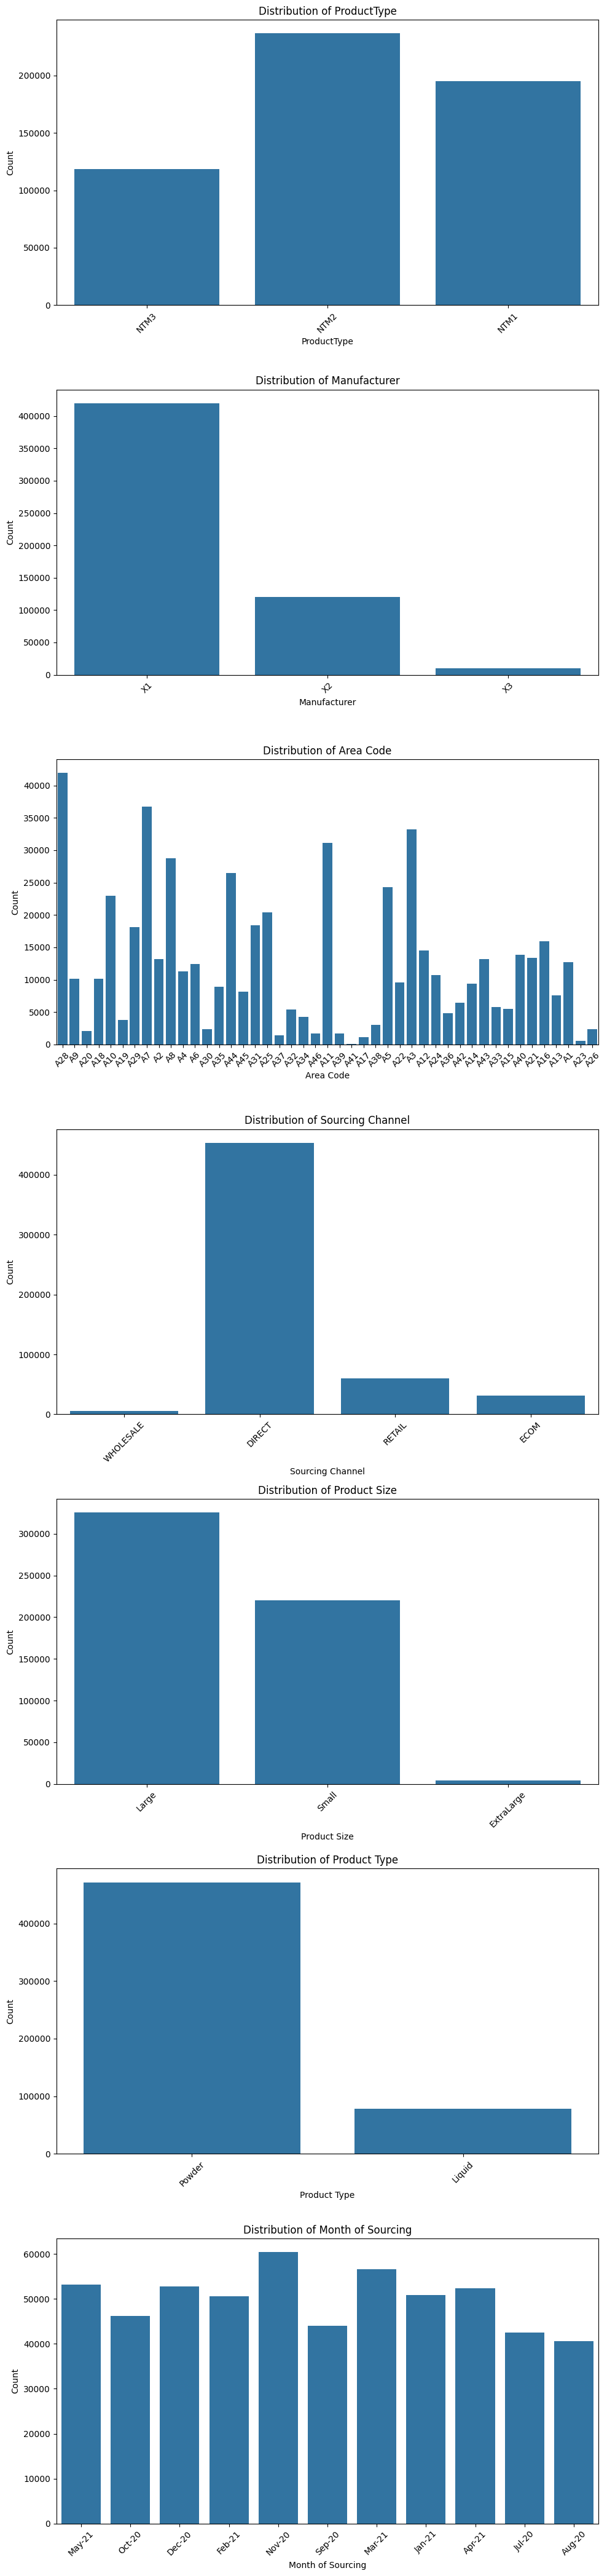

In [ ]:
# List of categorical features
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']

# Create subplots to visualize multiple categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 6*len(categorical_features)))

# Loop through each categorical feature and plot its distribution
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=training_df, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. preprocessing and more eda


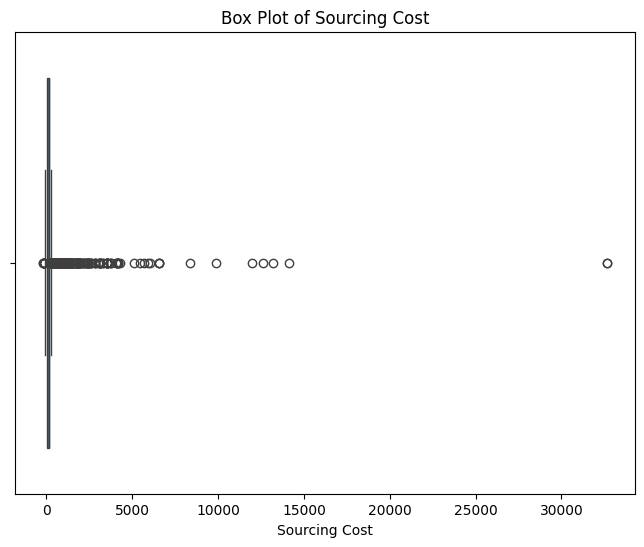

Outliers identified using z-scores:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
1098          NTM2           X1       A29           DIRECT        Small   
1230          NTM3           X1       A35           DIRECT        Small   
1267          NTM1           X1       A29           DIRECT        Small   
1385          NTM3           X1       A35           DIRECT        Small   
1533          NTM1           X1       A29           DIRECT        Small   
...            ...          ...       ...              ...          ...   
549588        NTM2           X1       A29           DIRECT        Large   
549589        NTM2           X1       A29           DIRECT        Large   
549942        NTM3           X1       A35           DIRECT   ExtraLarge   
549946        NTM2           X1       A38           DIRECT        Small   
549985        NTM2           X1       A29           DIRECT        Large   

       Product Type Month of Sourcing  Sourcing Cost  
1098    

In [ ]:
# finding outliers using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sourcing Cost', data=training_df)
plt.title("Box Plot of Sourcing Cost")
plt.xlabel("Sourcing Cost")
plt.show()

# z-scores
z_scores = (training_df['Sourcing Cost'] - training_df['Sourcing Cost'].mean()) / training_df['Sourcing Cost'].std()
outliers_zscore = training_df[np.abs(z_scores) > 3]  # threshold of 3 for z-score
print("Outliers identified using z-scores:")
print(outliers_zscore)

In [ ]:
# removing outliers using IQR
q1 = training_df['Sourcing Cost'].quantile(0.25)
q3 = training_df['Sourcing Cost'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

cleaned_training_df = training_df[(training_df['Sourcing Cost'] >= lower_bound) & (training_df['Sourcing Cost'] <= upper_bound)]

num_outliers_removed = len(training_df) - len(cleaned_training_df)
print(f"Number of outliers removed: {num_outliers_removed}")

cleaned_training_df.reset_index(drop=True, inplace=True)

Number of outliers removed: 2666


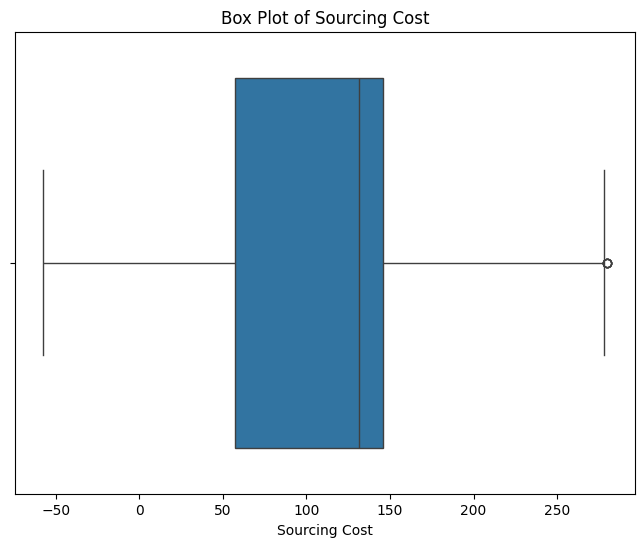

In [ ]:
# boxplot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sourcing Cost', data=cleaned_training_df)
plt.title("Box Plot of Sourcing Cost")
plt.xlabel("Sourcing Cost")
plt.show()

In [ ]:
cleaned_training_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [ ]:
# converting Month of Sourcing to datetime in both training and testing datasets
cleaned_training_df['Month of Sourcing'] = pd.to_datetime(cleaned_training_df['Month of Sourcing'], format='%b-%y')
cleaned_training_df['Month of Sourcing'] = cleaned_training_df['Month of Sourcing'].dt.to_period('M').dt.to_timestamp()

testing_df['Month of Sourcing'] = pd.to_datetime(testing_df['Month of Sourcing'], format='%b-%y')
testing_df['Month of Sourcing'] = testing_df['Month of Sourcing'].dt.to_period('M').dt.to_timestamp()

<ipython-input-17-45054d944e75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_df['Month of Sourcing'] = pd.to_datetime(cleaned_training_df['Month of Sourcing'], format='%b-%y')
<ipython-input-17-45054d944e75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_df['Month of Sourcing'] = cleaned_training_df['Month of Sourcing'].dt.to_period('M').dt.to_timestamp()


In [ ]:
# Set index to Month of Sourcing for both datasets
cleaned_training_df.set_index('Month of Sourcing', inplace=True)
testing_df.set_index('Month of Sourcing', inplace=True)

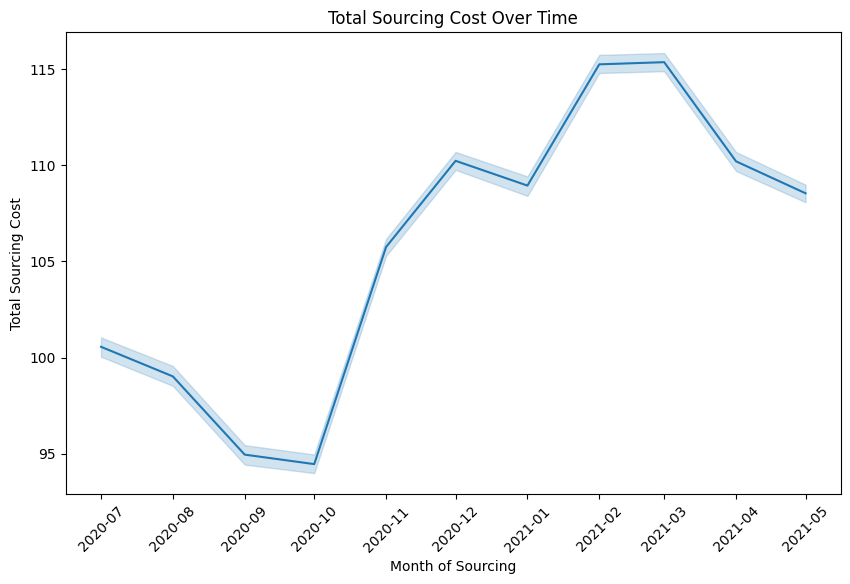

In [ ]:
# plot month of sourcing vs sourcing cost after sorting the months
cleaned_training_df_sorted = cleaned_training_df.sort_values(by='Month of Sourcing')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month of Sourcing', y='Sourcing Cost', data=cleaned_training_df_sorted)
plt.title('Total Sourcing Cost Over Time')
plt.xlabel('Month of Sourcing')
plt.ylabel('Total Sourcing Cost')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# create month and year features for training and testing datasets
cleaned_training_df['Month'] = cleaned_training_df.index.month
cleaned_training_df['Year'] = cleaned_training_df.index.year

testing_df['Month'] = testing_df.index.month
testing_df['Year'] = testing_df.index.year

<ipython-input-20-180a0398b23f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_df['Month'] = cleaned_training_df.index.month
<ipython-input-20-180a0398b23f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_df['Year'] = cleaned_training_df.index.year


In [ ]:
cleaned_training_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Month,Year
Month of Sourcing,,,,,,,,,
2021-05-01,NTM3,X1,A28,WHOLESALE,Large,Powder,10.16,5,2021
2020-10-01,NTM2,X1,A9,DIRECT,Large,Powder,134.28,10,2020
2020-12-01,NTM3,X2,A20,DIRECT,Large,Powder,12.46,12,2020
2021-02-01,NTM3,X1,A18,WHOLESALE,Small,Powder,107.22,2,2021
2020-11-01,NTM2,X1,A28,DIRECT,Large,Liquid,197.76,11,2020


In [ ]:
testing_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Month,Year
Month of Sourcing,,,,,,,,,
2021-06-01,NTM1,X1,A1,DIRECT,Small,Powder,103.68,6,2021
2021-06-01,NTM1,X1,A10,DIRECT,Large,Powder,155.75,6,2021
2021-06-01,NTM1,X1,A10,ECOM,Large,Powder,143.02,6,2021
2021-06-01,NTM1,X1,A11,DIRECT,Large,Powder,139.39,6,2021
2021-06-01,NTM1,X1,A2,DIRECT,Large,Powder,169.42,6,2021


In [ ]:
# one hot encoding the training and testing datasets
# have to remove month of sourcing as index first
cleaned_training_df.reset_index(inplace=True)
testing_df.reset_index(inplace=True)

In [ ]:
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
X_categorical = cleaned_training_df[categorical_features]

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_features = encoder.fit_transform(X_categorical)

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# concatenate encoded features with original dataframe
df_encoded = pd.concat([cleaned_training_df.drop(columns=categorical_features), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# this is the final training dataset
df_encoded.head()

,Month of Sourcing,Sourcing Cost,Month,Year,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,...,Area Code_A9,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,2021-05-01,10.16,5,2021,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2020-10-01,134.28,10,2020,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020-12-01,12.46,12,2020,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2021-02-01,107.22,2,2021,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,2020-11-01,197.76,11,2020,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_categorical_test = testing_df[categorical_features]
encoded_features_test = encoder.transform(X_categorical_test)

encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(categorical_features))

testing_df_encoded = pd.concat([testing_df.drop(columns=categorical_features), encoded_df_test], axis=1)

In [ ]:
# this is the final testing dataset
testing_df_encoded.head()

,Month of Sourcing,Sourcing Cost,Month,Year,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,...,Area Code_A9,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,2021-06-01,103.68,6,2021,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2021-06-01,155.75,6,2021,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2021-06-01,143.02,6,2021,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2021-06-01,139.39,6,2021,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2021-06-01,169.42,6,2021,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train = df_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost'])
y_train = df_encoded['Sourcing Cost']

X_test = testing_df_encoded.drop(columns=['Month of Sourcing', 'Sourcing Cost'])
y_test = testing_df_encoded['Sourcing Cost']

## 5. model training using xgboost

In [ ]:
xgb_regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                                n_estimators=2000,
                                early_stopping_rounds=50,
                                objective='reg:linear',
                                max_depth=3,
                                learning_rate=0.01) # some parameter tuning

xgb_regressor.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

y_pred_xgb = xgb_regressor.predict(X_test)

[0]	validation_0-rmse:118.53618	validation_1-rmse:116.71836


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:27:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:53.58834	validation_1-rmse:51.49943
[200]	validation_0-rmse:36.24760	validation_1-rmse:36.59702
[300]	validation_0-rmse:32.37431	validation_1-rmse:34.94096
[400]	validation_0-rmse:30.87678	validation_1-rmse:34.56634
[500]	validation_0-rmse:29.85301	validation_1-rmse:34.08150
[600]	validation_0-rmse:29.09309	validation_1-rmse:33.58164
[700]	validation_0-rmse:28.47251	validation_1-rmse:33.14760
[800]	validation_0-rmse:27.97591	validation_1-rmse:32.82394
[900]	validation_0-rmse:27.55814	validation_1-rmse:32.58445
[1000]	validation_0-rmse:27.21521	validation_1-rmse:32.46116
[1100]	validation_0-rmse:26.91634	validation_1-rmse:32.34891
[1200]	validation_0-rmse:26.67190	validation_1-rmse:32.28306
[1300]	validation_0-rmse:26.40918	validation_1-rmse:32.18725
[1400]	validation_0-rmse:26.20861	validation_1-rmse:32.11370
[1500]	validation_0-rmse:26.02646	validation_1-rmse:32.07501
[1600]	validation_0-rmse:25.88250	validation_1-rmse:32.03711
[1700]	validation_0-rmse:25.74944

In [ ]:
mae = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (MSE):", mse)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred_xgb)
print("R-squared (R2):", r2)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 19.681094516118367
Mean Squared Error (MSE): 1025.4719018514381
Root Mean Squared Error (RMSE): 32.02299020784034
R-squared (R2): 0.622009678180889
Mean Absolute Percentage Error (MAPE): 0.4702388413735739


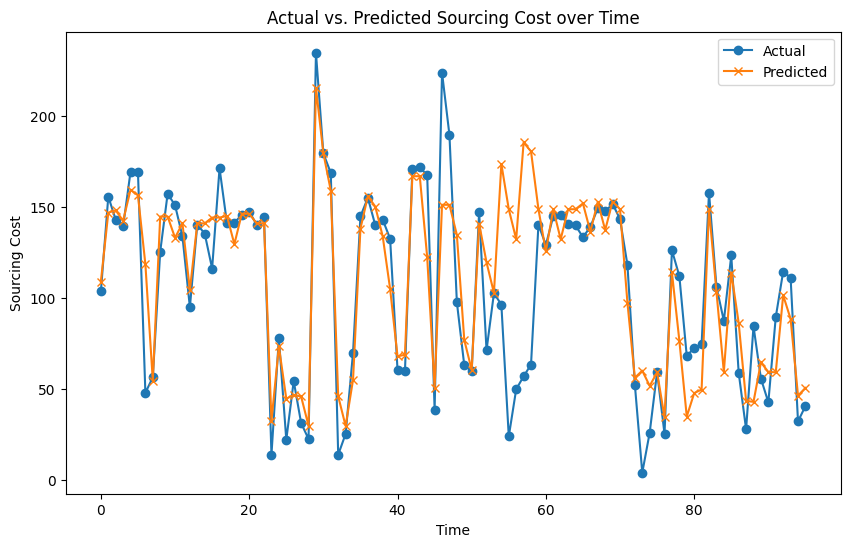

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_xgb, label='Predicted', marker='x')
plt.xlabel('Time')
plt.ylabel('Sourcing Cost')
plt.title('Actual vs. Predicted Sourcing Cost over Time')
plt.legend()
plt.show()

In [ ]:
print("Actual\t\tPredicted (XGBoost)")
for i in range(len(y_test)):
    print(f"{y_test[i]:.2f}\t\t{y_pred_xgb[i]:.2f}")

Actual		Predicted (XGBoost)
103.68		109.07
155.75		146.89
143.02		148.14
139.39		142.50
169.42		159.49
169.15		156.39
47.99		118.63
56.52		54.77
125.51		144.77
157.27		144.77
151.02		133.13
133.83		141.03
95.00		104.33
140.40		141.03
135.40		141.03
116.25		144.21
171.26		144.21
141.14		145.09
141.32		129.62
145.84		146.32
147.54		146.32
140.34		141.03
144.45		141.03
13.98		32.58
78.05		73.43
22.22		44.78
54.47		46.83
31.44		45.99
22.62		29.93
234.71		215.44
179.40		179.56
168.73		159.00
14.01		46.12
25.46		29.80
70.00		55.17
144.89		138.20
155.08		155.92
140.03		150.27
143.08		133.93
132.60		105.05
60.53		68.05
59.75		68.90
170.71		166.92
171.75		166.92
167.43		122.44
38.66		50.57
223.78		151.21
189.59		151.21
97.74		134.74
63.12		77.02
59.82		60.57
147.40		140.90
71.39		119.63
102.73		102.85
96.39		173.61
24.05		148.80
49.96		132.33
57.04		185.47
63.53		180.51
140.31		148.80
129.20		125.62
144.99		148.80
145.42		132.33
140.55		148.80
139.91		148.80
133.44		151.99
139.09		136.52
149.23

## 6. model training using random forest

In [ ]:
rf_regressor = RandomForestRegressor()

rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (MSE):", mse)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred_rf)
print("R-squared (R2):", r2)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 16.54506570034923
Mean Squared Error (MSE): 1064.9830090072226
Root Mean Squared Error (RMSE): 32.63407741927482
R-squared (R2): 0.6074458309586683
Mean Absolute Percentage Error (MAPE): 0.3322390803478039


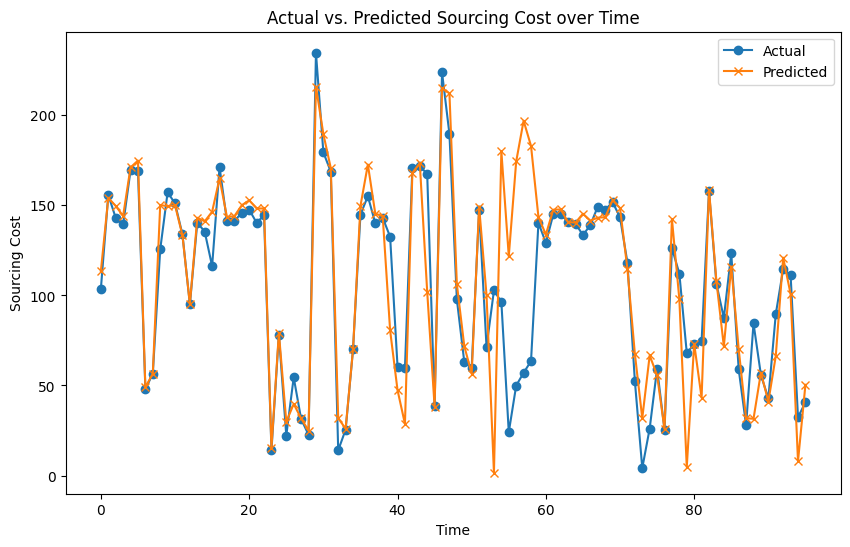

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_rf, label='Predicted', marker='x')
plt.xlabel('Time')
plt.ylabel('Sourcing Cost')
plt.title('Actual vs. Predicted Sourcing Cost over Time')
plt.legend()
plt.show()

## 7. model training using LightGBM

In [ ]:
lgb_regressor = lgb.LGBMRegressor()

lgb_regressor.fit(X_train, y_train)

y_pred_lgb = lgb_regressor.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 547510, number of used features: 62
[LightGBM] [Info] Start training from score 106.312687


In [ ]:
mae = mean_absolute_error(y_test, y_pred_lgb)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, y_pred_lgb)
print("Mean Squared Error (MSE):", mse)
rmse = mean_squared_error(y_test, y_pred_lgb, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, y_pred_lgb)
print("R-squared (R2):", r2)
mape = mean_absolute_percentage_error(y_test, y_pred_lgb)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 16.350939150366752
Mean Squared Error (MSE): 1002.6909486400904
Root Mean Squared Error (RMSE): 31.66529565060289
R-squared (R2): 0.6304067681646874
Mean Absolute Percentage Error (MAPE): 0.36826984024743087


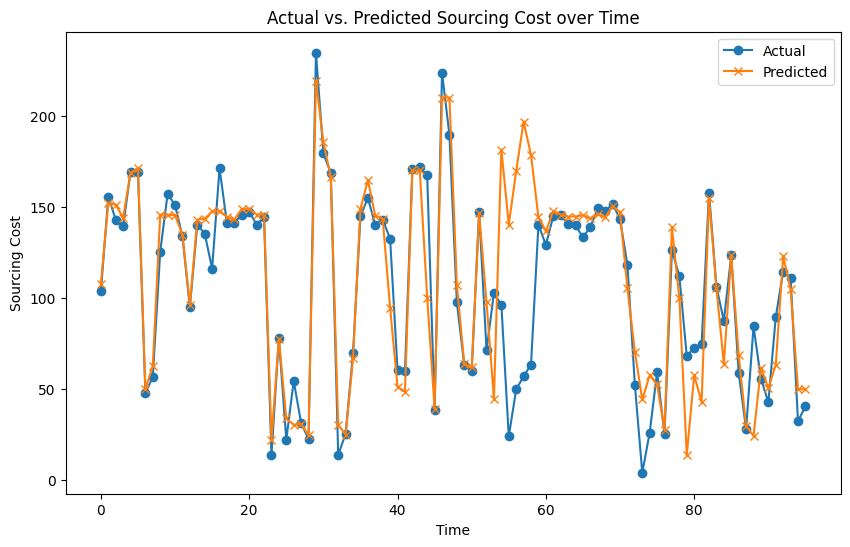

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_lgb, label='Predicted', marker='x')
plt.xlabel('Time')
plt.ylabel('Sourcing Cost')
plt.title('Actual vs. Predicted Sourcing Cost over Time')
plt.legend()
plt.show()

## 8. comparing evaluation metrics

In [ ]:
# metrics for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# metrics for LightGBM
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
mape_lgb = mean_absolute_percentage_error(y_test, y_pred_lgb)

print("XGBoost metrics:")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R2:", r2_xgb)
print("MAPE:", mape_xgb)
print()

print("Random Forest metrics:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)
print("MAPE:", mape_rf)
print()

print("LightGBM metrics:")
print("MAE:", mae_lgb)
print("MSE:", mse_lgb)
print("RMSE:", rmse_lgb)
print("R2:", r2_lgb)
print("MAPE:", mape_lgb)

XGBoost metrics:
MAE: 19.681094516118367
MSE: 1025.4719018514381
RMSE: 32.02299020784034
R2: 0.622009678180889
MAPE: 0.4702388413735739

Random Forest metrics:
MAE: 16.54506570034923
MSE: 1064.9830090072226
RMSE: 32.63407741927482
R2: 0.6074458309586683
MAPE: 0.3322390803478039

LightGBM metrics:
MAE: 16.350939150366752
MSE: 1002.6909486400904
RMSE: 31.66529565060289
R2: 0.6304067681646874
MAPE: 0.36826984024743087


## 9. Explanation

### **a. Cleaning the data**

#### The first thing i noticed when i was exploring the dataset was that there were entries in the training data where the Sourcing Cost had negative values. I then checked for negative values in Sourcing Cost in the Testing data and couldn't find any. Since i have minnimal domain knowledge i was unsure if this was poor data quality or not, so i trained models in both the scenarios. The results i got in both scenarios did not vary in the slightest which is why i decided to keep the negative Sourcing Cost in the training data.

### **b. Outliers**

#### I also trained the models with and without outliers in Sourcing Cost but again the results i got were exactly the same. I decided to remove the outliers.

### **c. Approaches**

####As this is a time series problem, we can solve this problem using Machine Learning Regression to make predictions or using models such as VAR or ARIMA to make forecasts. I have not worked with the latter models, which is why i went ahead with Regression to solve the problem. I used the following models:
1. XGBoost Regressor
2. Random Forest Regressor
3. LightGBM Regressor

I had four main approaches while transforming the dataset:
1. treating the 'Month of Sourcing' as categorical and one-hot encoding it with the rest of the categorical features.
2. treating the 'Month of Sourcing' as categorical and label encoding it with the rest of the categorical features.
3. extracting the month and year from the 'Month of Sourcing' as numerical values, and one-hot encode the categorical features.
4. extracting the month and year from the 'Month of Sourcing' as numerical values, and label encode the categorical features.

Extracting the month and year from the 'Month of Sourcing' as numerical values, and one-hot encoding the categorical features provided the best results overall so that is the pipeline I chose for my final approach.

From the results obtained, it was found that:
- LightGBM had the lowest MAE score of 16.35
- LightGBM had the lowest MSE score of 1002.69
- LightGBM had the lowest RMSE score of 31.67
- Random Forest had the lowest R2 score of 0.61
- Random Forest had the lowest MAPE score of 0.33

Therefore for the final approach, I decided to go with the following pipeline:
1. keep duplicate values
2. remove outliers
3. keep negative values
4. extract numerical 'Month' and 'Year' features from 'Month of Sourcing'
5. encode the categorical features
6. Train and Test XGBoost regressor
7. plot the predictions of Sourcing Cost vs the actual Sourcing Cost for Jun-21

